In [5]:
# 1. Install libraries
!pip install scikit-learn pandas matplotlib seaborn xgboost --quie

In [6]:
# 2. Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import joblib

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve

In [7]:
# 3. Upload and load .pkl files
from google.colab import files
uploaded = files.upload()

all_files = glob.glob('*.pkl')
dataframes = [pd.read_pickle(file) for file in all_files]
df = pd.concat(dataframes, ignore_index=True)

print(f"Dataset shape: {df.shape}")
df.head()

Saving 2018-04-01.pkl to 2018-04-01.pkl
Saving 2018-04-02.pkl to 2018-04-02.pkl
Saving 2018-04-03.pkl to 2018-04-03.pkl
Saving 2018-04-04.pkl to 2018-04-04.pkl
Saving 2018-04-05.pkl to 2018-04-05.pkl
Saving 2018-04-06.pkl to 2018-04-06.pkl
Saving 2018-04-07.pkl to 2018-04-07.pkl
Saving 2018-04-08.pkl to 2018-04-08.pkl
Saving 2018-04-09.pkl to 2018-04-09.pkl
Saving 2018-04-10.pkl to 2018-04-10.pkl
Saving 2018-04-11.pkl to 2018-04-11.pkl
Saving 2018-04-12.pkl to 2018-04-12.pkl
Saving 2018-04-13.pkl to 2018-04-13.pkl
Saving 2018-04-14.pkl to 2018-04-14.pkl
Saving 2018-04-15.pkl to 2018-04-15.pkl
Saving 2018-04-16.pkl to 2018-04-16.pkl
Saving 2018-04-17.pkl to 2018-04-17.pkl
Saving 2018-04-18.pkl to 2018-04-18.pkl
Saving 2018-04-19.pkl to 2018-04-19.pkl
Saving 2018-04-20.pkl to 2018-04-20.pkl
Saving 2018-04-21.pkl to 2018-04-21.pkl
Saving 2018-04-22.pkl to 2018-04-22.pkl
Saving 2018-04-23.pkl to 2018-04-23.pkl
Saving 2018-04-24.pkl to 2018-04-24.pkl
Saving 2018-04-25.pkl to 2018-04-25.pkl


,TRANSACTION_ID,TX_DATETIME,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD,TX_FRAUD_SCENARIO
0,853461,2018-06-29 00:00:04,1506,1604,25.92,7689604,89,0,0
1,853462,2018-06-29 00:00:25,4218,1308,25.38,7689625,89,0,0
2,853463,2018-06-29 00:01:03,4496,133,45.30,7689663,89,0,0
3,853464,2018-06-29 00:02:46,1308,8760,154.99,7689766,89,0,0
4,853465,2018-06-29 00:04:05,4820,1569,141.27,7689845,89,1,2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1754155 entries, 0 to 1754154
Data columns (total 9 columns):
 #   Column             Dtype         
---  ------             -----         
 0   TRANSACTION_ID     int64         
 1   TX_DATETIME        datetime64[ns]
 2   CUSTOMER_ID        object        
 3   TERMINAL_ID        object        
 4   TX_AMOUNT          float64       
 5   TX_TIME_SECONDS    object        
 6   TX_TIME_DAYS       object        
 7   TX_FRAUD           int64         
 8   TX_FRAUD_SCENARIO  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(4)
memory usage: 120.4+ MB
None
       TRANSACTION_ID                    TX_DATETIME     TX_AMOUNT  \
count    1.754155e+06                        1754155  1.754155e+06   
mean     8.770770e+05  2018-07-01 11:20:33.708571904  5.363230e+01   
min      0.000000e+00            2018-04-01 00:00:31  0.000000e+00   
25%      4.385385e+05     2018-05-16 14:40:46.500000  2.101000e+01   
50%      8.770770e+05

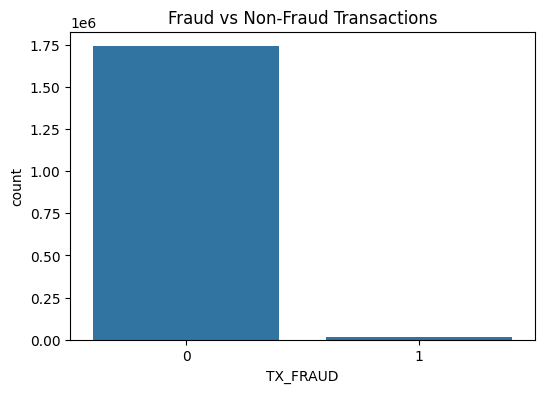

Fraud Rate: 0.84%


In [8]:
# 4. Basic EDA
print(df.info())
print(df.describe())

plt.figure(figsize=(6,4))
sns.countplot(data=df, x='TX_FRAUD')
plt.title('Fraud vs Non-Fraud Transactions')
plt.show()

fraud_rate = df['TX_FRAUD'].mean()
print(f"Fraud Rate: {fraud_rate:.2%}")

In [9]:
# 5. Feature Engineering
df['TX_DATETIME'] = pd.to_datetime(df['TX_DATETIME'])
df['DAY_OF_WEEK'] = df['TX_DATETIME'].dt.dayofweek
df['HOUR'] = df['TX_DATETIME'].dt.hour

scaler = StandardScaler()
df['TX_AMOUNT_SCALED'] = scaler.fit_transform(df[['TX_AMOUNT']])

features = ['TX_AMOUNT_SCALED', 'DAY_OF_WEEK', 'HOUR']
X = df[features]
y = df['TX_FRAUD']

In [10]:
# 6. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(f"Training samples: {X_train.shape[0]}, Testing samples: {X_test.shape[0]}")

Training samples: 1227908, Testing samples: 526247


In [11]:
# 7. Model Training
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:38:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [12]:
# 8. Evaluation Function
def evaluate_model(model, name):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:,1]

    print(f"----{name}----")
    print(classification_report(y_test, y_pred))
    print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f'{name} (area = {roc_auc_score(y_test, y_prob):.2f})')
    plt.plot([0,1],[0,1],'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{name} - ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

----Logistic Regression----
              precision    recall  f1-score   support

           0       0.99      1.00      1.00    521843
           1       1.00      0.10      0.18      4404

    accuracy                           0.99    526247
   macro avg       1.00      0.55      0.59    526247
weighted avg       0.99      0.99      0.99    526247

ROC-AUC Score: 0.6549036978983015


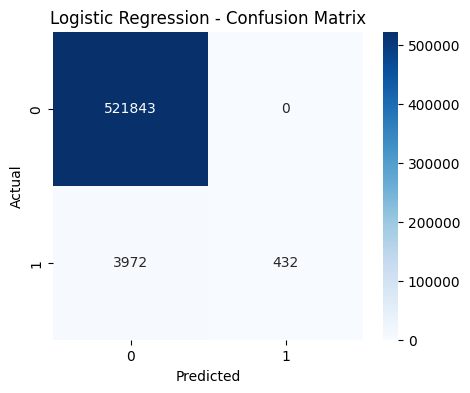

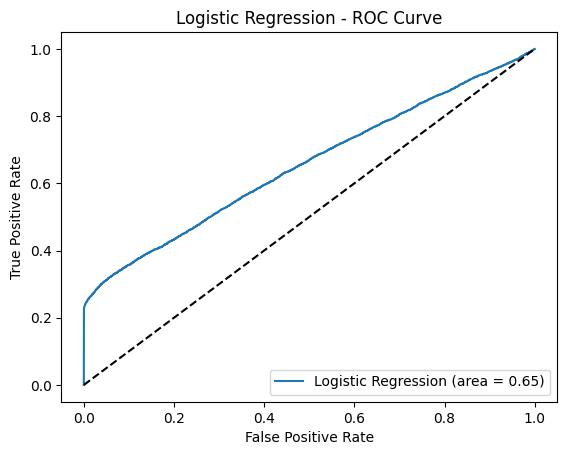

----Random Forest----
              precision    recall  f1-score   support

           0       0.99      1.00      0.99    521843
           1       0.30      0.23      0.26      4404

    accuracy                           0.99    526247
   macro avg       0.65      0.61      0.63    526247
weighted avg       0.99      0.99      0.99    526247

ROC-AUC Score: 0.6172882819442304


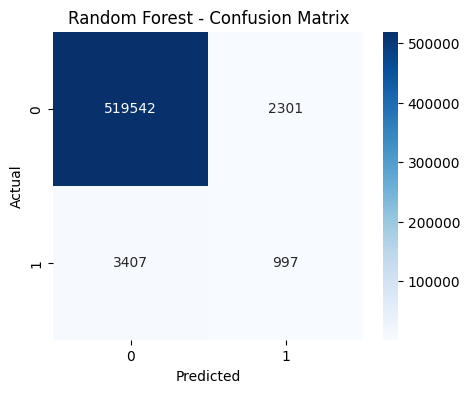

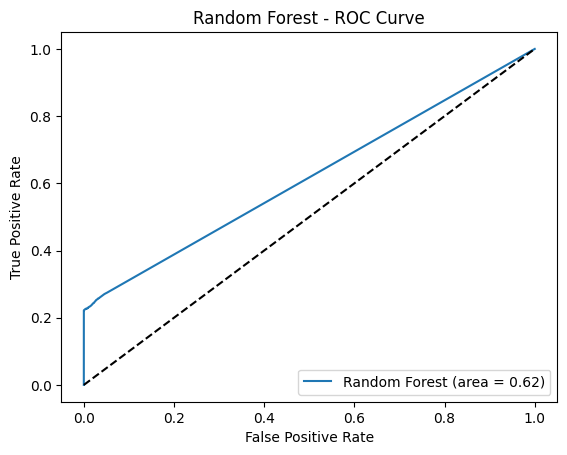

----XGBoost----
              precision    recall  f1-score   support

           0       0.99      1.00      1.00    521843
           1       0.50      0.13      0.20      4404

    accuracy                           0.99    526247
   macro avg       0.75      0.56      0.60    526247
weighted avg       0.99      0.99      0.99    526247

ROC-AUC Score: 0.6396670499863578


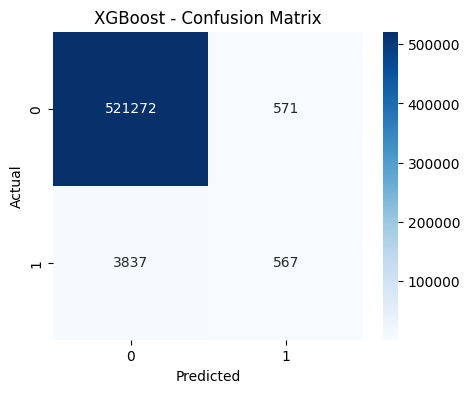

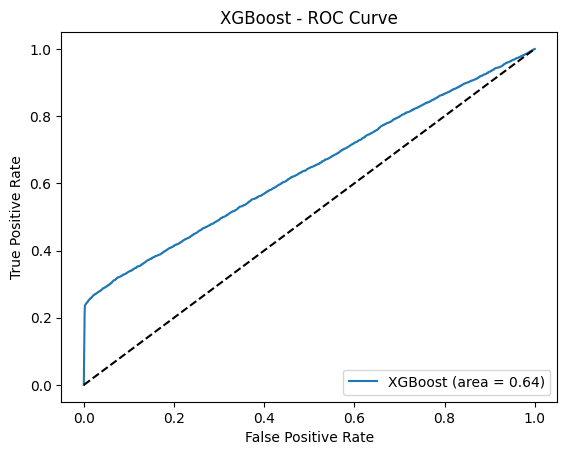

In [13]:
# 9. Evaluate models
evaluate_model(lr_model, "Logistic Regression")
evaluate_model(rf_model, "Random Forest")
evaluate_model(xgb_model, "XGBoost")

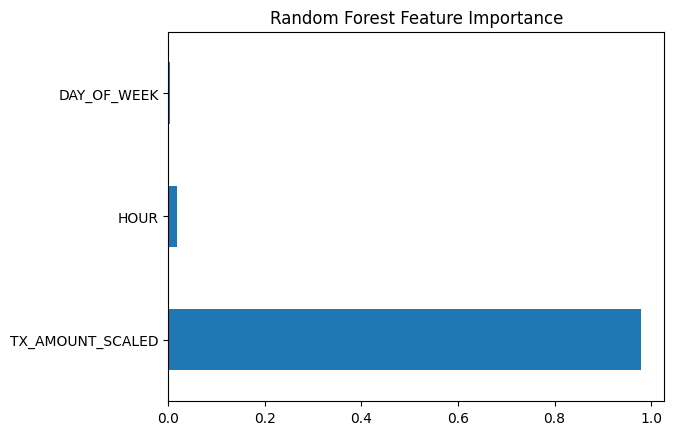

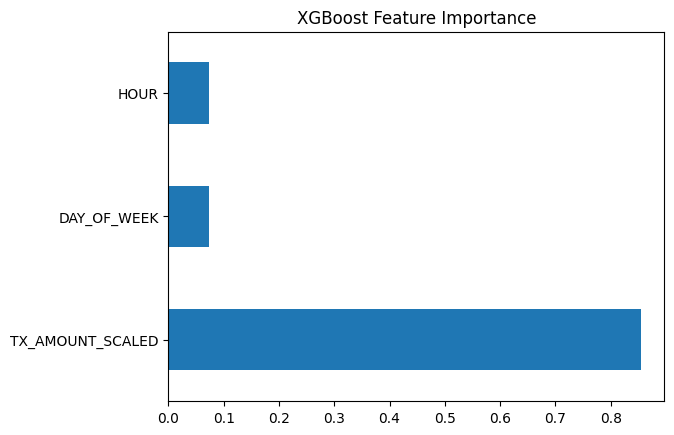

In [14]:
# 10. Feature Importance
def plot_feature_importance(model, feature_names, title):
    if hasattr(model, 'feature_importances_'):
        importance = model.feature_importances_
        feat_imp = pd.Series(importance, index=feature_names)
        feat_imp.nlargest(10).plot(kind='barh')
        plt.title(title)
        plt.show()

plot_feature_importance(rf_model, features, "Random Forest Feature Importance")
plot_feature_importance(xgb_model, features, "XGBoost Feature Importance")

In [15]:
# 11. Save the best model
joblib.dump(rf_model, 'fraud_detection_random_forest.pkl')
print("Random Forest model saved as 'fraud_detection_random_forest.pkl'")



Random Forest model saved as 'fraud_detection_random_forest.pkl'
